In [1]:
import pandas as pd
import itertools as itt
import ppinetsim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
import networkx as nx
import seaborn as sns

In [9]:
parameters = ppinetsim.Parameters('parameter_settings/params_AP-MS_200.json')

In [12]:
parameters.num_studies

91

In [34]:
node_degrees_simulated_er, _, node_degrees_er, _ = ppinetsim.run_simulation(parameters, verbose=True)

In [15]:
parameters.generator = 'barabasi-albert'
node_degrees_simulated_ba, _, node_degrees_ba, _ = ppinetsim.run_simulation(parameters, verbose=True)

In [40]:
%%time
likelihood_at_k = ppinetsim.estimate_likelihood(parameters, num_simulations_per_generator=10)

CPU times: user 1min 57s, sys: 6.81 s, total: 2min 4s
Wall time: 2min 5s


In [39]:
distr_simulated_er = ppinetsim.degrees_to_distribution(node_degrees_simulated_er)
distr_simulated_ba = ppinetsim.degrees_to_distribution(node_degrees_simulated_ba)
distr_er = ppinetsim.degrees_to_distribution(node_degrees_er)
distr_ba = ppinetsim.degrees_to_distribution(node_degrees_ba)

Text(0, 0.5, 'Fraction')

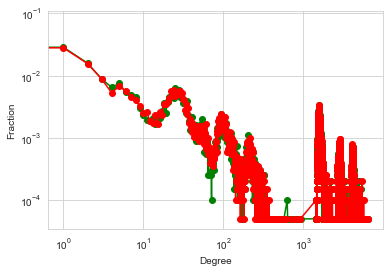

In [40]:
plt.loglog(distr_simulated_er[0,],distr_simulated_er[1,],'go-')
plt.loglog(distr_simulated_ba[0,],distr_simulated_ba[1,],'ro-')
#plt.loglog(distr_ba[0,],distr_ba[1,],'bo-')
#plt.loglog(distr_er[0,],distr_er[1,],'yo-')
plt.xlabel('Degree')
plt.ylabel('Fraction')

In [32]:
wasserstein_distance(distr_simulated_ba[0,], distr_ba[0,], distr_simulated_ba[1,], distr_ba[1,])

1385.2509999999575

In [33]:
wasserstein_distance(distr_simulated_ba[0,], distr_er[0,], distr_simulated_ba[1,], distr_er[1,])

1405.844299999956

In [15]:
filename = 'ppinetsim/data/AP-MS/1328865.csv'
adj_sampled_study = pd.read_csv(filename, index_col=0)

In [41]:
likelihood_at_k['k'] = likelihood_at_k.index

In [42]:
data = likelihood_at_k.melt(value_vars=['erdos-renyi', 'barabasi-albert'], id_vars=['k'],
                     var_name='generator', value_name='likelihood')

In [26]:
data

,k,generator,likelihood
0,1,erdos-renyi,1.000000
1,2,erdos-renyi,0.500000
2,3,erdos-renyi,0.666667
3,4,erdos-renyi,0.750000
4,5,erdos-renyi,0.800000
5,6,erdos-renyi,0.666667
6,7,erdos-renyi,0.571429
7,8,erdos-renyi,0.500000
8,9,erdos-renyi,0.444444
9,10,erdos-renyi,0.500000


In [18]:
edge_list = []
for edge in itt.product(adj_sampled_study.index, adj_sampled_study.columns):
    if adj_sampled_study.loc[edge]:
        edge_list.append(edge)

In [21]:
observed_network = nx.Graph()
observed_network.add_edges_from(edge_list)

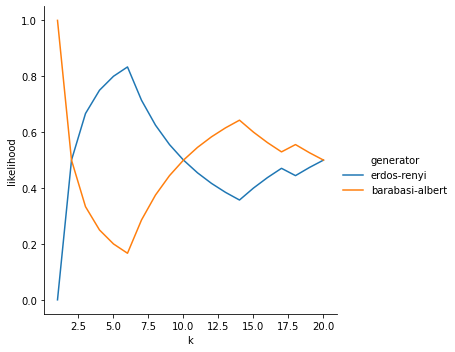

In [43]:
fig = sns.relplot(data=data, x='k', y='likelihood', hue='generator', kind='line')

In [37]:
fig.savefig('bayesian_inference.pdf')